In [73]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import shutil

# Parámetros de ejecución

Modificaremos las siguientes variables para la ejecución del modelo

1. La ruta de la carpeta donde se encuentra el proyecto:

In [74]:
dir_route = '/Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/Chancay/09_Chancay_VZ2019_Vs760_Logic Tree_Properties modified - Forearc'

2. Cantidad de puntos a ser evaluados

In [76]:
number_points = 4

3. Aceleraciones espectrales

In [79]:
periods = [0.01, 0.02, 0.05, 0.075, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 4.0, 5.0, 7.5, 10.0]
number_periods = len(periods)

# Ejecución del modelo y obtención de las curvas de peligro

In [80]:
!oq dbserver stop
!oq dbserver start

Ejecución del modelo

In [81]:
job_route = dir_route + '/job.ini'
!oq engine --run '{job_route}'

/Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:296: ExperimentalWarning: KuehnEtAl2020SInter is experimental and may change in future versions - the user is liable for their application
  warnings.warn(msg, ExperimentalWarning)
/Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:296: ExperimentalWarning: KuehnEtAl2020SSlab is experimental and may change in future versions - the user is liable for their application
  warnings.warn(msg, ExperimentalWarning)
[2024-02-08 13:17:40 #14 INFO] emanuelsotoortega@MacBook-Air-de-Emanuel.local running /Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/Chancay/09_Chancay_VZ2019_Vs760_Logic Tree_Properties modified - Forearc/job.ini [--hc=None]
[2024-02-08 13:17:40 #14 INFO] Using engine version 3.18.0
[2024-02-08 13:17:40 #14 WARNING] Using 8 processpool wor

Cambiar el siguiente valor, según el ID obtenido al ejecutar la anterior celda:

In [ ]:
calculation_id = 14

Los resultados se guardarán en la carpeta `output` dentro del proyecto

In [82]:
output_route = dir_route + '/output'

In [83]:
if os.path.exists(output_route):
    shutil.rmtree(output_route)

Obtención de los resultados

In [84]:
!oq engine --export-outputs {calculation_id} '{output_route}'

Exporting fullreport...
/Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:296: ExperimentalWarning: KuehnEtAl2020SInter is experimental and may change in future versions - the user is liable for their application
  warnings.warn(msg, ExperimentalWarning)
/Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:296: ExperimentalWarning: KuehnEtAl2020SSlab is experimental and may change in future versions - the user is liable for their application
  warnings.warn(msg, ExperimentalWarning)
/Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/Chancay/09_Chancay_VZ2019_Vs760_Logic Tree_Properties modified - Forearc/output/report_14.rst
Exporting hcurves...
/Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:296: ExperimentalWa

In [ ]:
ts_list = ['PGA', 'SA(0.2)', 'SA(0.5)', 'SA(1.0)', 'SA(2.0)']
ts_values = [0.01, 0.20, 0.50, 1.00, 2.00]

In [85]:
hazard_mean_files = os.listdir(output_route)
hazard_mean_csv_files = []

for ts in ts_list:
    for csv_file in hazard_mean_files:
        if csv_file.startswith('hazard_curve-mean-' + ts):
            hazard_mean_csv_files.append(csv_file)

hazard_mean_csv_files

['hazard_curve-mean-PGA_14.csv',
 'hazard_curve-mean-SA(0.2)_14.csv',
 'hazard_curve-mean-SA(0.5)_14.csv',
 'hazard_curve-mean-SA(1.0)_14.csv',
 'hazard_curve-mean-SA(2.0)_14.csv']

# Generación de las graficas de las curvas de peligro

In [ ]:
number_poes = 6
poes_values = [0.4, 0.1, 0.05, 0.02, 0.01, 0.005]
tr_list = ['Tr= 100 años', 'Tr= 475 años', 'Tr= 1000 años', 'Tr= 2475 años', 'Tr= 5000 años', 'Tr= 10000 años']

poes = ['poe=' + str(poe_value) + ' - ' + tr_list[i] for i, poe_value in enumerate(poes_values)]
#poes = ['poe=0.4 - Tr=100yr', 'poe=0.1 - Tr=475yr', 'poe=0.05 - Tr=1000yr', 'poe=0.02 - Tr=2475yr', 'poe=0.01 - Tr=5000yr', 'poe=0.005 - Tr=10000yr']

In [86]:
dir_point_routes = [output_route + '/Punto ' + str(i+1) for i in range(number_points)]

for i in range(number_points):
    os.mkdir(dir_point_routes[i])

In [87]:
curves_df = []

for point in range(number_points):
    curve_df = pd.DataFrame()

    for i, csv_file in enumerate(hazard_mean_csv_files):
        curve = pd.read_csv(output_route + '/' + csv_file, header=1)
        curve = curve.drop(columns=['custom_site_id', 'lon', 'lat', 'depth'], errors='ignore')

        curve = curve.iloc[point, 4:].transpose().reset_index()

        
        
        curve_df['sa (Ts= ' + str(ts_values[i]) + ')'] = curve['index'].apply(lambda x : float(x[4:]))
        curve_df['poe (Ts= ' + str(ts_values[i]) + ')'] = curve[point]

        curve_df.to_excel(dir_point_routes[point] + '/hazard_curve_table.xlsx')

    curves_df.append(curve_df)

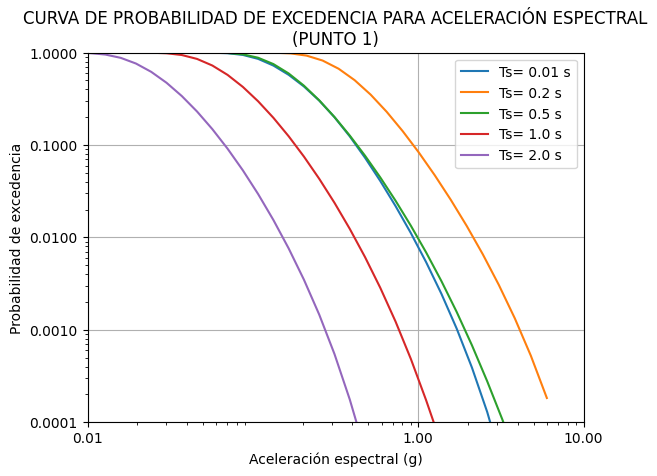

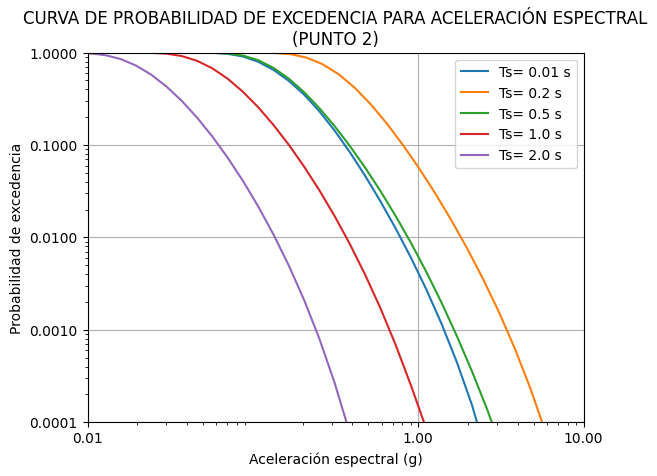

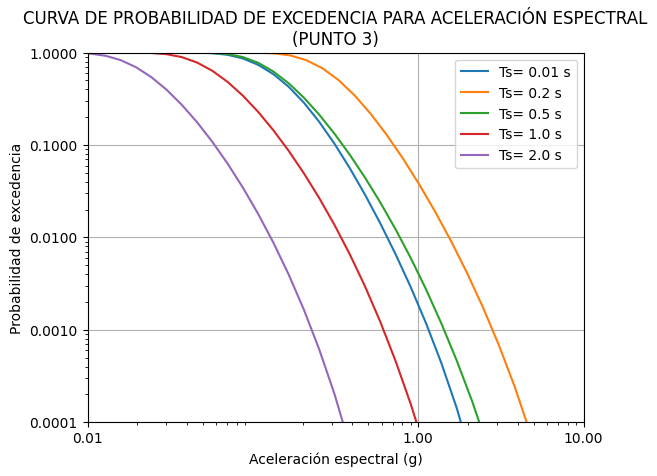

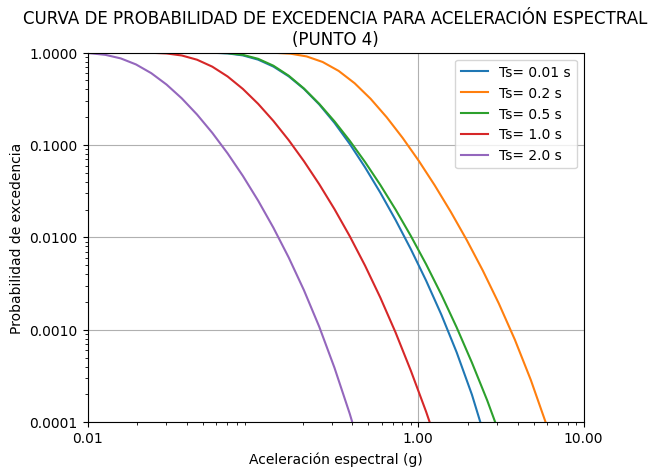

In [88]:
for point in range(number_points):
    fig, ax = plt.subplots()

    ax.set_title('CURVA DE PROBABILIDAD DE EXCEDENCIA PARA ACELERACIÓN ESPECTRAL\n(PUNTO ' + str(point+1) + ')')

    ax.set_xscale('log')
    ax.set_xlim(0.01, 10.00)
    ax.set_xticks([0.01, 1.00, 10.00])
    ax.set_xlabel('Aceleración espectral (g)')

    ax.set_yscale('log')
    ax.set_ylim(0.0001, 1)
    ax.set_yticks([0.0001, 0.001, 0.01, 0.1, 1])
    ax.set_ylabel('Probabilidad de excedencia')

    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    for i in range(len(ts_values)):
        ax.plot(curves_df[point].iloc[:, 2 * i], curves_df[point].iloc[:, 2 * i + 1], label='Ts= ' + str(ts_values[i]) + ' s')

    ax.legend(loc='best')
    plt.grid(True)

    plt.savefig(dir_point_routes[point] + '/hazard_curve.png')
    plt.show()

# Generación de las gráficas de Espectros de Peligro Uniforme

In [89]:
hazard_uhs_mean_csv = ''

for csv_file in hazard_mean_files:
    if csv_file.startswith('hazard_uhs-mean'):
        hazard_uhs_mean_csv = csv_file

hazard_uhs_mean_csv = output_route + '/' + hazard_uhs_mean_csv

In [90]:
hazard_uhs_mean_df = pd.read_csv(hazard_uhs_mean_csv, header=1)
hazard_uhs_mean_df = hazard_uhs_mean_df.drop(columns=['custom_site_id', 'lon', 'lat'], errors='ignore')

hazard_uhs_mean_df.head()

,0.400000~PGA,0.400000~SA(0.02),0.400000~SA(0.05),0.400000~SA(0.075),0.400000~SA(0.1),0.400000~SA(0.15),0.400000~SA(0.2),0.400000~SA(0.25),0.400000~SA(0.3),0.400000~SA(0.4),...,0.005000~SA(0.5),0.005000~SA(0.75),0.005000~SA(1.0),0.005000~SA(1.5),0.005000~SA(2.0),0.005000~SA(3.0),0.005000~SA(4.0),0.005000~SA(5.0),0.005000~SA(7.5),0.005000~SA(10.0)
0,0.212815,0.224031,0.350346,0.459702,0.524934,0.530795,0.475681,0.421187,0.358081,0.274870,...,1.228274,0.763757,0.504552,0.277719,0.184581,0.094922,0.059490,0.043245,0.024880,0.016857
1,0.188304,0.197977,0.309417,0.406497,0.458951,0.465909,0.422395,0.373813,0.321457,0.247621,...,1.066458,0.669512,0.447394,0.246758,0.164672,0.084534,0.052634,0.038055,0.021616,0.014517
2,0.170518,0.178591,0.278932,0.364195,0.412400,0.418808,0.378002,0.338570,0.291172,0.226624,...,0.946863,0.609121,0.414602,0.230376,0.154770,0.079382,0.049140,0.035124,0.019586,0.012899
3,0.205148,0.215238,0.337572,0.440820,0.498606,0.503017,0.450581,0.399241,0.341553,0.262615,...,1.124291,0.708830,0.475768,0.261535,0.173210,0.089689,0.056074,0.040518,0.022957,0.015277


In [91]:
uhs_tables = []

for point in range(number_points):
    uhs_table = pd.DataFrame()
    uhs_table['period'] = pd.Series(periods)

    for i, poe in enumerate(poes):
        uhs_table[poe] = hazard_uhs_mean_df.iloc[point, i * number_periods : (i+1) * number_periods].reset_index(drop=True)

    uhs_table.to_excel(dir_point_routes[point] + '/uhs_table.xlsx')

    uhs_tables.append(uhs_table)


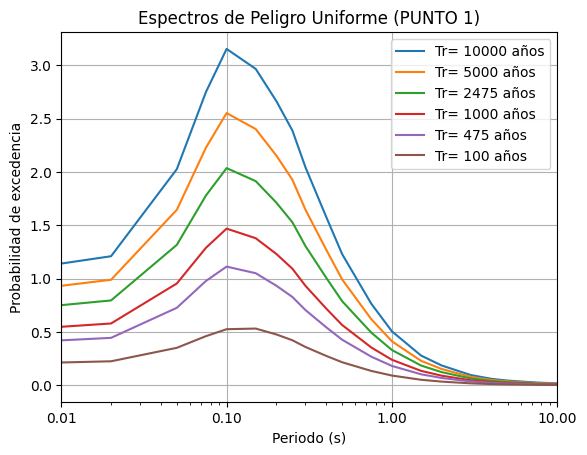

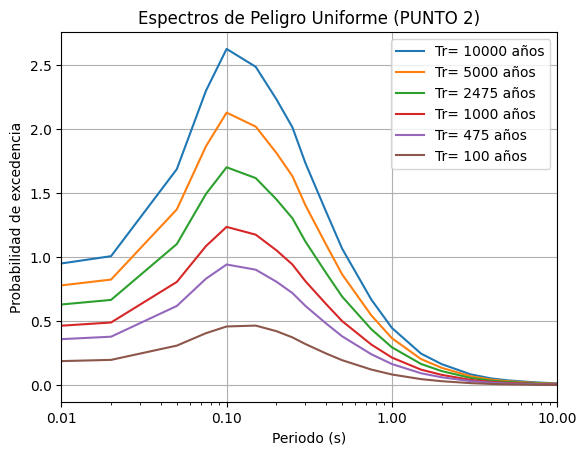

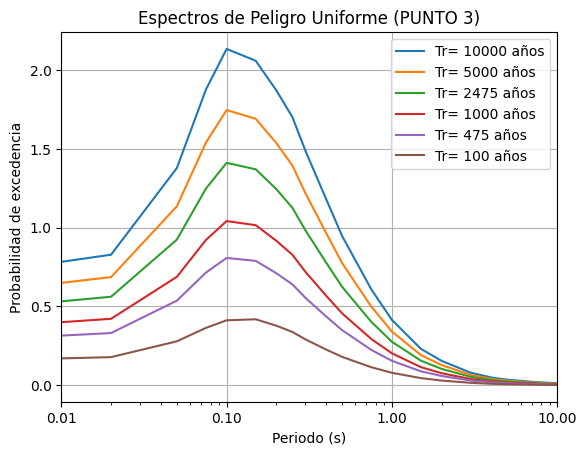

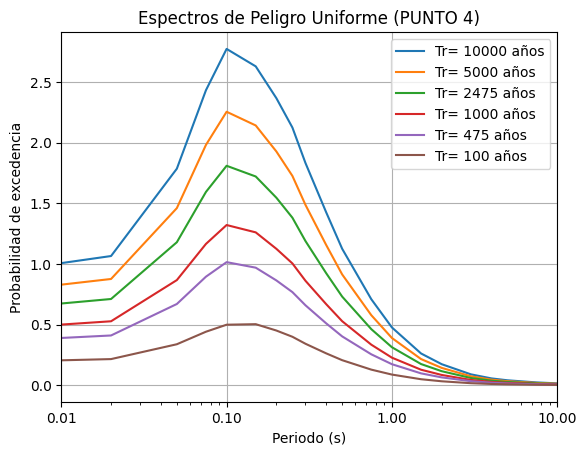

In [92]:
for point in range(number_points):
    fig, ax = plt.subplots()

    ax.set_title('Espectros de Peligro Uniforme (PUNTO ' + str(point+1) + ')')

    ax.set_xscale('log')
    ax.set_xlim(0.01, 10.00)
    ax.set_xticks([0.01, 0.10, 1.00, 10.00])
    ax.set_xlabel('Periodo (s)')

    #ax.set_ylim(0.0001, 1)
    #ax.set_yticks([0.0001, 0.001, 0.01, 0.1, 1])
    ax.set_ylabel('Probabilidad de excedencia')

    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    for i, poe in enumerate(reversed(poes)):
        ax.plot(uhs_tables[point]['period'], uhs_tables[point][poe], label=tr_list[-i-1])

    ax.legend(loc='best')
    plt.grid(True)

    plt.savefig(dir_point_routes[point] + '/uhs_graphic.png')
    plt.show()